Calculating and Displaying the Best Results...

Best Results Across Metrics:
Accuracy: Best Model = CNN, Value = 99.971008
Precision: Best Model = CNN, Value = 99.969780
Recall: Best Model = CNN, Value = 99.978947
F1 Score: Best Model = CNN, Value = 99.974249

>>> Bar Chart for Model Comparison


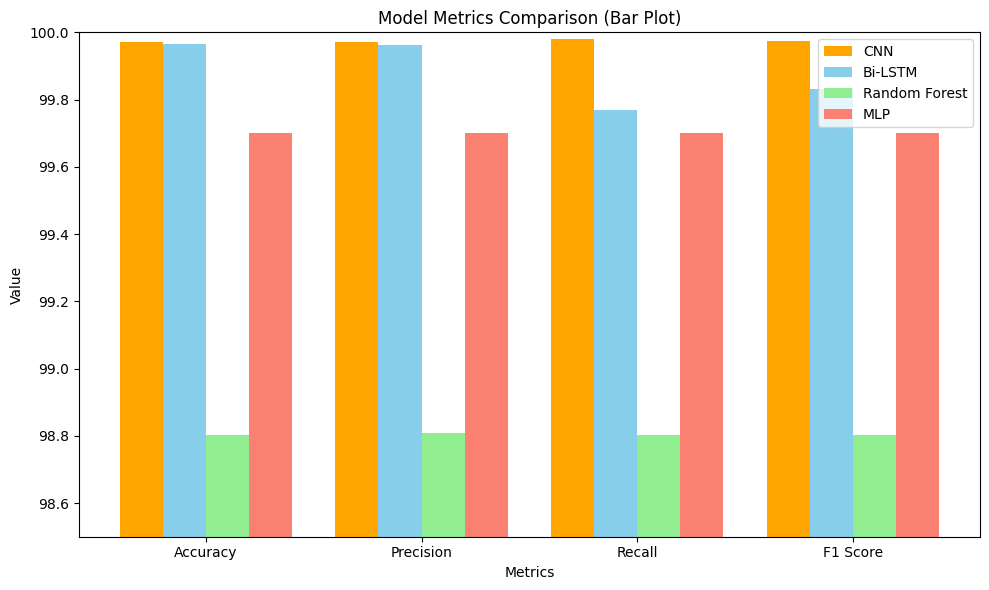

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files into DataFrames (Replace with your actual CSV paths)
cnn_df = pd.read_csv('../Metrics_Files/CNN_Metrics.csv')
bilstm_df = pd.read_csv('../Metrics_Files/Bilstm_Metrics.csv')
rf_df = pd.read_csv('../Metrics_Files/Random_Forest_Metrics.csv')
mlp_df = pd.read_csv('../Metrics_Files/MLP_Metrics.csv')

# Extract values for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cnn_metrics = (cnn_df.set_index('Metric').loc[metrics]['Value'].values) * 100
bilstm_metrics = (bilstm_df.set_index('Metric').loc[metrics]['Value'].values) * 100
rf_metrics = (rf_df.set_index('Metric').loc[metrics]['Value'].values) * 100
mlp_metrics = (mlp_df.set_index('Metric').loc[metrics]['Value'].values) * 100

# 1. Bar Plot for Model Comparison
def bar_plot():
    print("\n>>> Bar Chart for Model Comparison")
    x = range(len(metrics))
    width = 0.2
    
    plt.figure(figsize=(10, 6))
    plt.bar([i - width*1.5 for i in x], cnn_metrics, width=width, label='CNN', color='orange')  # CNN bars first
    plt.bar([i - width/2 for i in x], bilstm_metrics, width=width, label='Bi-LSTM', color='skyblue')
    plt.bar([i + width/2 for i in x], rf_metrics, width=width, label='Random Forest', color='lightgreen')
    plt.bar([i + width*1.5 for i in x], mlp_metrics, width=width, label='MLP', color='salmon')
    
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.ylim(98.5, 100)
    plt.title('Model Metrics Comparison (Bar Plot)')
    plt.xticks(ticks=x, labels=metrics)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Display Best Results for Each Metric
def display_best_results():
    print("Calculating and Displaying the Best Results...")
    all_metrics = pd.DataFrame({
        'CNN': cnn_metrics,  # CNN at the top in the best results display
        'Bi-LSTM': bilstm_metrics,
        'Random Forest': rf_metrics,
        'MLP': mlp_metrics
    }, index=metrics)
    
    # Find the best values for each metric
    best_values = all_metrics.max(axis=1)
    best_models = all_metrics.idxmax(axis=1)

    print("\nBest Results Across Metrics:")
    for metric in metrics:
        print(f"{metric}: Best Model = {best_models[metric]}, Value = {best_values[metric]:.6f}")

# Call the bar plot and best results display
display_best_results()
bar_plot()

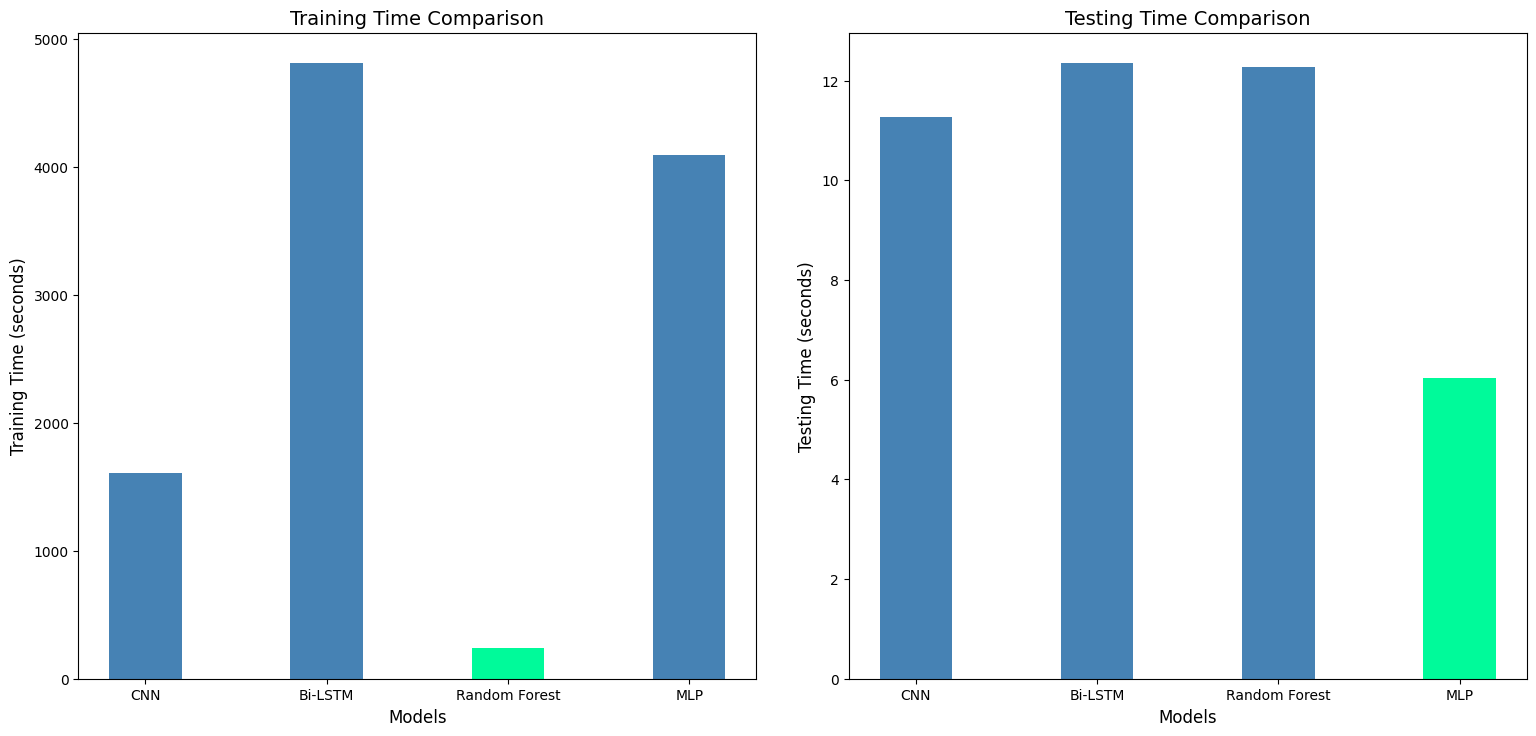

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files into DataFrames (Replace with your actual CSV paths)
cnn_df = pd.read_csv('../Metrics_Files/CNN_Metrics.csv')  # CNN metrics first
bilstm_df = pd.read_csv('../Metrics_Files/Bilstm_Metrics.csv')
rf_df = pd.read_csv('../Metrics_Files/Random_Forest_Metrics.csv')
mlp_df = pd.read_csv('../Metrics_Files/MLP_Metrics.csv')

# Extract Training and Testing Times
def get_times(df):
    training_time = df.set_index('Metric').loc['Training Time']['Value']
    testing_time = df.set_index('Metric').loc['Testing Time']['Value']
    return training_time, testing_time

cnn_train_time, cnn_test_time = get_times(cnn_df)
bilstm_train_time, bilstm_test_time = get_times(bilstm_df)
rf_train_time, rf_test_time = get_times(rf_df)
mlp_train_time, mlp_test_time = get_times(mlp_df)

# Function to plot training or testing times with different color for the lowest value
def plot_times(ax, times, title, ylabel):
    models = ['CNN', 'Bi-LSTM', 'Random Forest', 'MLP']
    
    # Find the index of the lowest value
    min_value = min(times)
    min_index = times.index(min_value)

    # Assign colors: Same color for all bars except the one with the lowest value
    colors = ['steelblue' if i != min_index else 'mediumspringgreen' for i in range(len(models))]

    # Plot the bars
    ax.bar(models, times, color=colors, width=0.4)
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

# 1. Bar Plot for Training Times
def plot_training_times(ax):
    training_times = [cnn_train_time, bilstm_train_time, rf_train_time, mlp_train_time]
    plot_times(ax, training_times, 'Training Time Comparison', 'Training Time (seconds)')

# 2. Bar Plot for Testing Times
def plot_testing_times(ax):
    testing_times = [cnn_test_time, bilstm_test_time, rf_test_time, mlp_test_time]
    plot_times(ax, testing_times, 'Testing Time Comparison', 'Testing Time (seconds)')

# Create subplots with larger figure size for clarity
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Increase figure size to 16x8 inches for better clarity

# Call the functions to plot the times
plot_training_times(axs[0])  # Plot for training times on the left
plot_testing_times(axs[1])   # Plot for testing times on the right

# Adjust layout
plt.tight_layout(pad=3.0)  # Increase padding between subplots for better spacing
plt.show()